In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

In [2]:
def comb(n, i):
    """
    二項係数
    :param n: n
    :param i: i
    :return: 二項係数
    """
    return math.factorial(n) / (math.factorial(i) * math.factorial(n - i))

In [3]:
def bezier(b, t):
    """
    ベジェ曲線
    :param b: ポイント
    :param t: t
    :return: ベジェ曲線
    """
    n = len(b)
    point = 0

    for i in range(n):
        point += b[i] * comb(n - 1, i) * ((1 - t) ** (n - i - 1)) * (t ** i)

    return point

[]

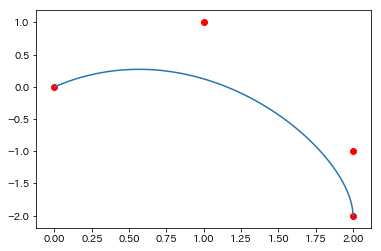

In [4]:
# ポイント
points = np.array([[0, 0], [1, 1], [2, -1], [2, -2]])

x_points = list()
y_points = list()

for t in np.linspace(0, 1, 100):
    # X座標の計算
    x_points.append(bezier(points[:, 0], t))

    # Y座標の計算
    y_points.append(bezier(points[:, 1], t))

# カーブの描画
plt.plot(x_points, y_points)

# 登録した4点の描画
plt.scatter(x=points[:, 0], y=points[:, 1], color='r')

plt.plot()

In [5]:
from scipy import special

n = 7
result = list()

for i in range(n):
    result.append([comb(n, i), special.comb(n, i)])

pd.DataFrame(result, columns=['二項係数', '二項係数 (SciPy)'])

,二項係数,二項係数 (SciPy)
0,1.0,1.0
1,7.0,7.0
2,21.0,21.0
3,35.0,35.0
4,35.0,35.0
5,21.0,21.0
6,7.0,7.0


[]

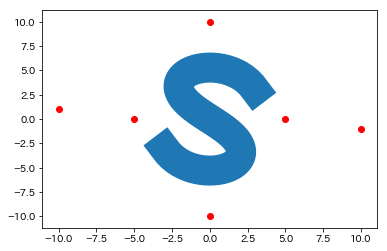

In [6]:
# 正解例

def comb(n, i):
    """
    二項係数
    :param n: n
    :param i: i
    :return: 二項係数
    """
    return math.factorial(n) / (math.factorial(i) * math.factorial(n - i))


def bezier(b, t):
    """
    ベジェ曲線
    :param b: ポイント
    :param t: t
    :return: ベジェ曲線
    """
    n = len(b)
    point = 0

    for i in range(n):
        point += b[i] * comb(n - 1, i) * ((1 - t) ** (n - i - 1)) * (t ** i)

    return point


points = np.array([[3, 3], [0, 10], [-10, 1], [5, 0], [-5, 0], [10, -1], [0, -10], [-3, -3]])
x_points = list()
y_points = list()

for t in np.linspace(0, 1, 100):
    x_points.append(bezier(points[:, 0], t))
    y_points.append(bezier(points[:, 1], t))

plt.plot(x_points, y_points, linewidth=30)
plt.scatter(x=points[:, 0], y=points[:, 1], color='r')
plt.plot()